<a href="https://colab.research.google.com/github/jdxxmahmud/mahdy-sir-re-acad-course/blob/main/Phase%201/Individual%20Assignments/Recorded%20Classes%20Notes/Machine%20Learning/Advanced%20ML/L07_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive

Mounted at /content/drive
/content/drive


In [2]:
working_directory = 'MyDrive/Colab Notebooks/Mahdy Sir Research Academy Course/Phase 1/Individual Assignments/Recorded Class Notes/Advanced ML/Datasets/'

In [3]:
dataset_name = "housing.csv"

### Reading data
Here the target column is **price**

In [4]:
import pandas as pd

df = pd.read_csv(f'{working_directory}/{dataset_name}')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Finding if any missing value exist

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.isnull().sum()   # To find how many null values are there. In this case, no null value.

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Encoding
Converting the categorical features to numerical features

We should always be careful when to use the following encoders
1. Ordinal Encoder
2. Label Encoder

It entirely depends on the what the data means. Because this conversion affects the performance of the algorithm.

In [10]:
from sklearn.preprocessing import OrdinalEncoder

#### Ordinal Encoder

In [11]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [15]:
ord_enc = OrdinalEncoder()

for col in categorical_columns:
  df[col] = ord_enc.fit_transform(df[[col]])

#### Label Encoder

Here the meaning is important. As unfurnished means no furniture. The rest of the values mean as they show. So we should specify the ranking.

In [13]:
rank = ['unfurnished', 'semi-furnished', 'furnished']

ord_enc = OrdinalEncoder(categories= [rank])

df['furnishingstatus'] = ord_enc.fit_transform(df[['furnishingstatus']])

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,2.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,2.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,2.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,2.0


### Visualizing Data

#### Importing Libraries

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Distribution of target value

<Axes: xlabel='price', ylabel='Density'>

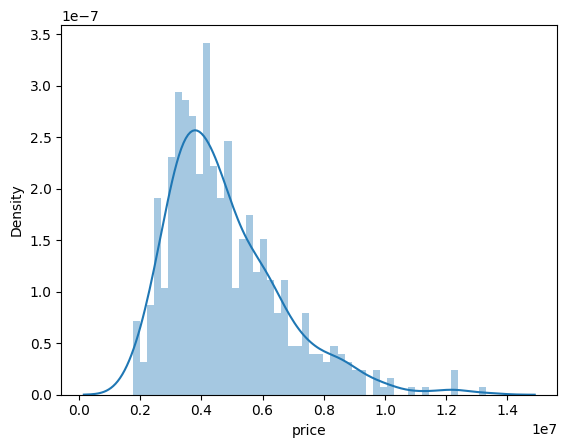

In [19]:
sns.distplot(df['price'], bins=50)

#### Pearson Correlation / Heatmap

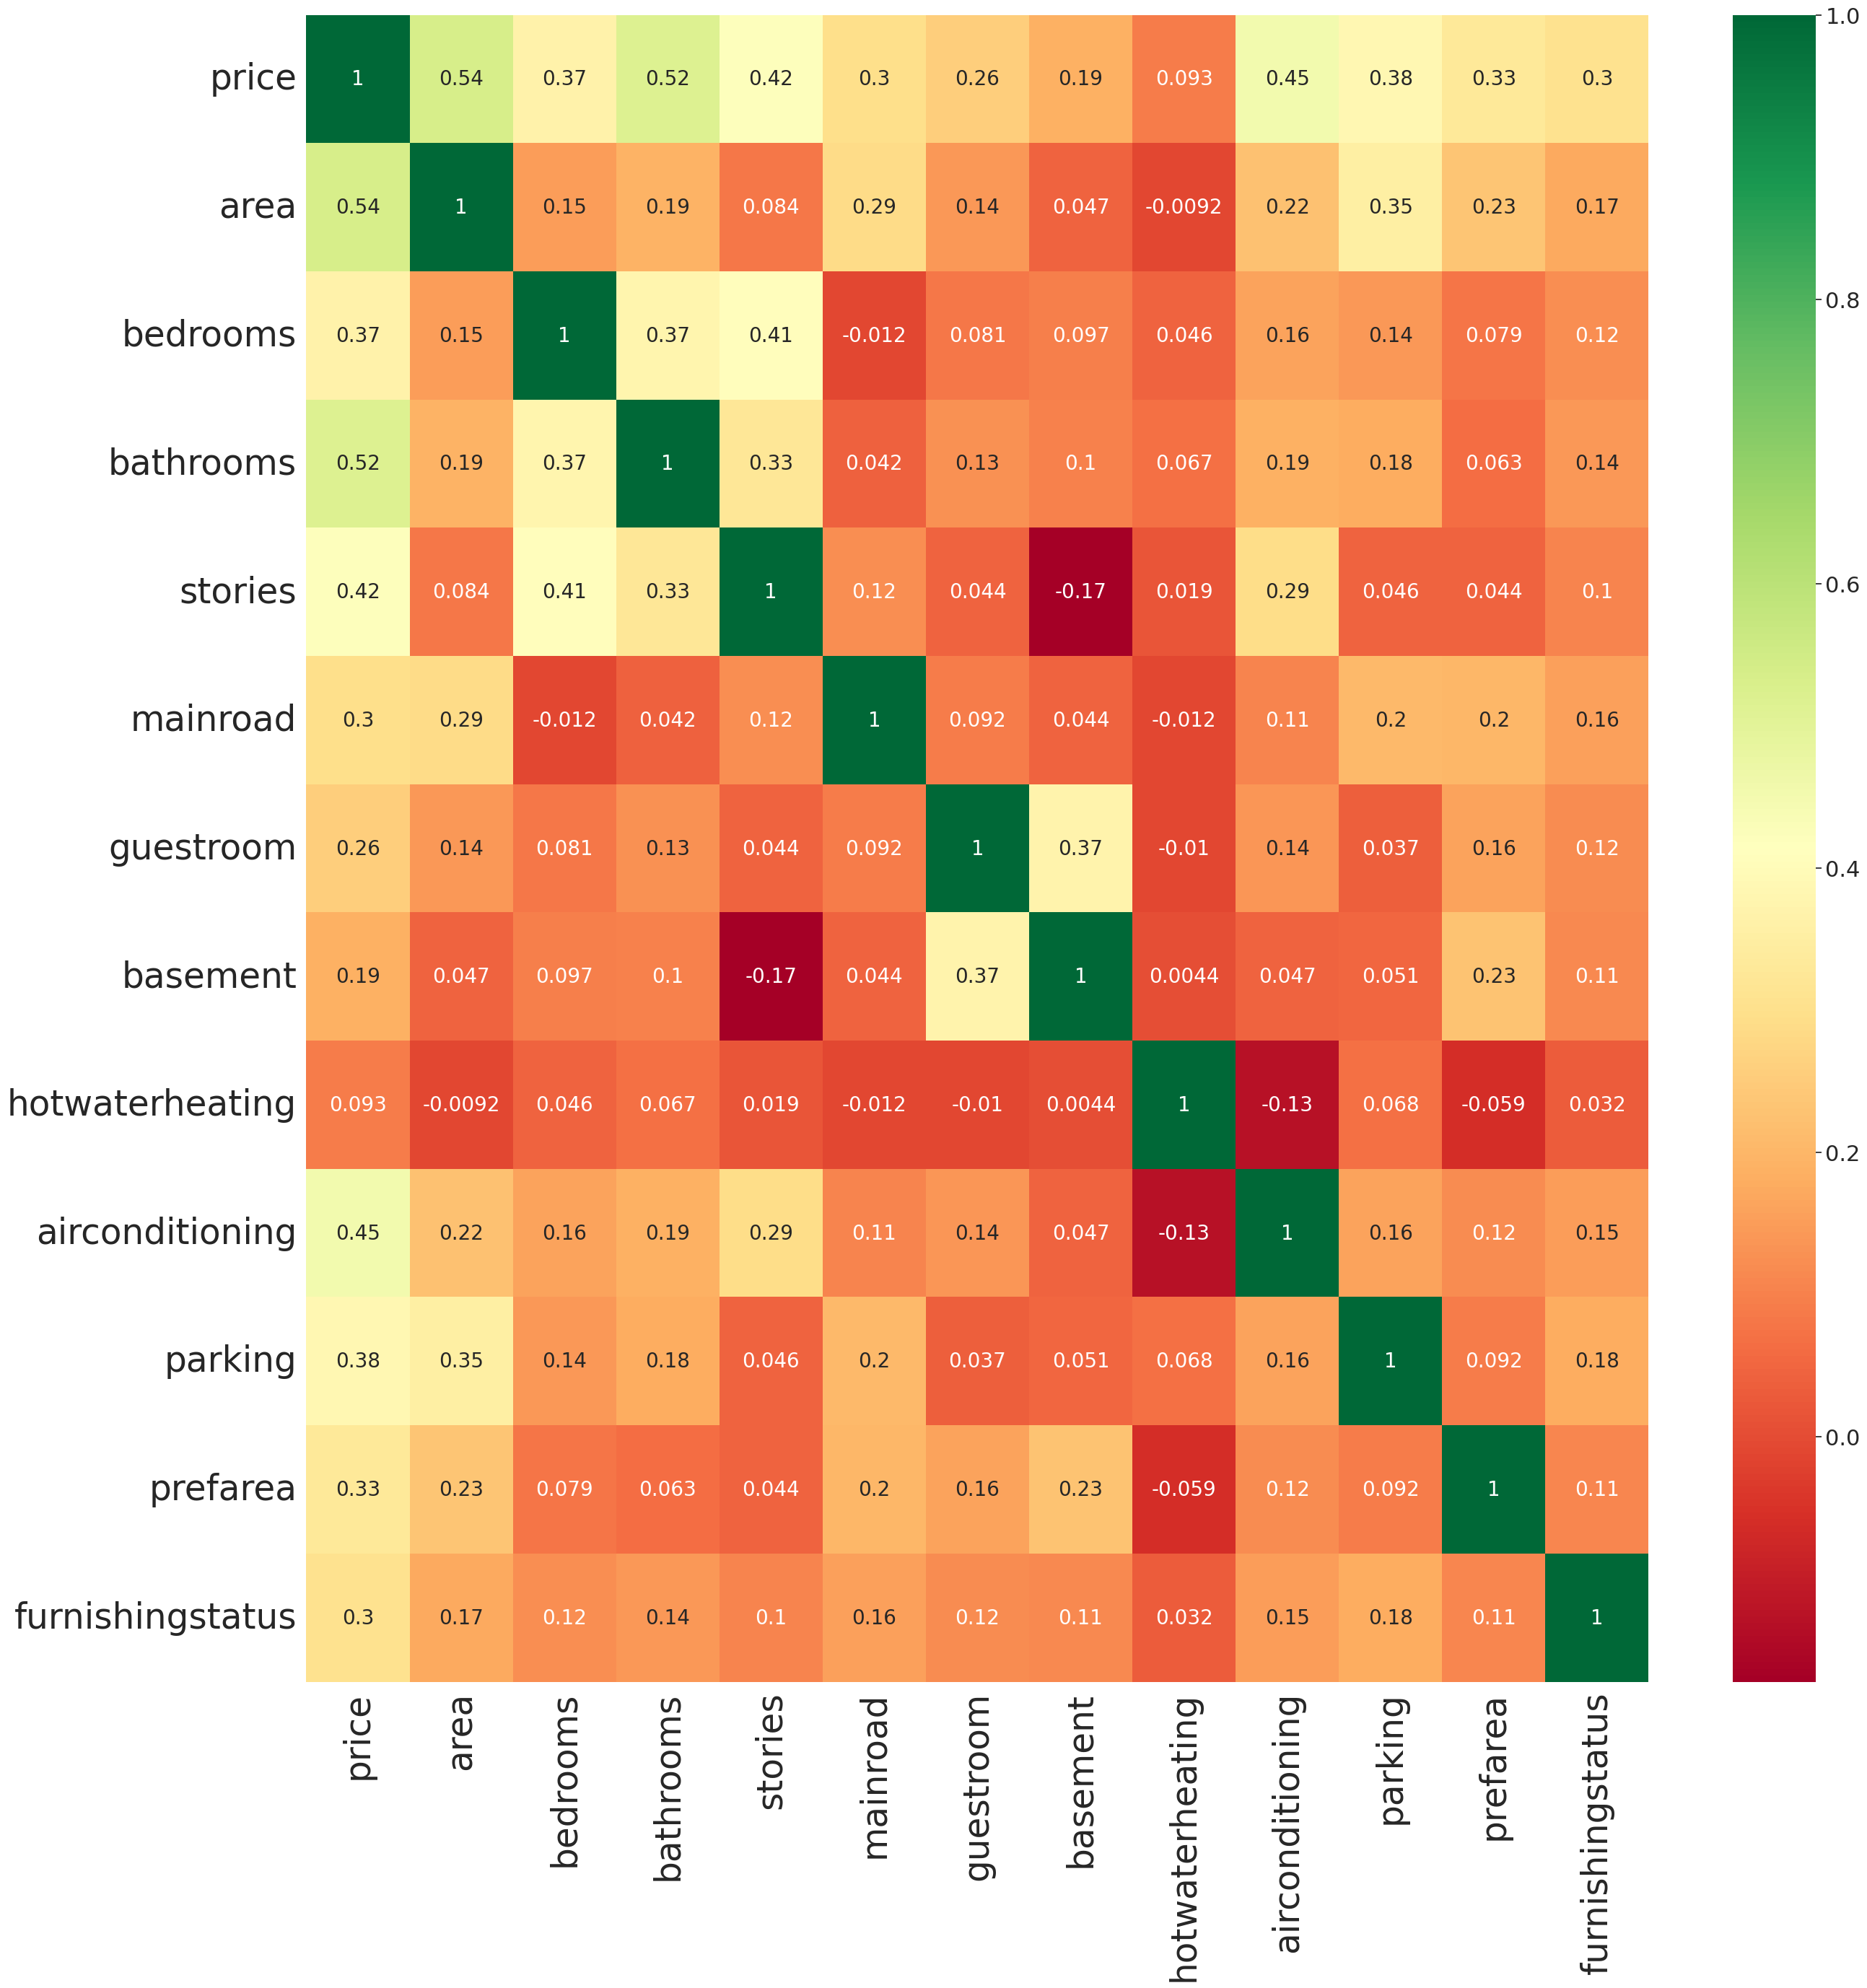

In [21]:
sns.set(font_scale=2)
plt.subplots(figsize=(30, 30))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 20})

plt.yticks(fontsize = 35)
plt.xticks(fontsize = 35)

plt.show()

### Training the Algorithm

#### Separation of target and features

In [23]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [24]:
print(X.shape, y.shape)

(545, 12) (545,)


#### Splitting the data into train and test

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Scaling the training data

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
X_train

array([[0.11752577, 0.2       , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.13745704, 0.4       , 0.33333333, ..., 0.66666667, 0.        ,
        0.5       ],
       [0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [0.13608247, 0.4       , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.28728522, 0.2       , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.0814433 , 0.2       , 0.        , ..., 0.        , 0.        ,
        0.5       ]])

#### Importing the algorithm

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()  # fit_intercept, copy_x, n_jobs

<font color = 'lime'>
  $y = Wx + b$ </br>
  same as $y = mx + c$ </br>
  $W$ is weight(slope) </br>
  $b$ is bias (intercept term/ constant)

</font>



In [31]:
reg.fit(X_train, y_train)

LinearRegression()

#### Predicting values for test data using the trained model

In [34]:
y_pred = reg.predict(X_test)
y_pred

array([ 3036242.71241135,  6695557.11525145,  2819494.31573132,
        3445780.16936735,  2788041.95274875,  2975851.2509509 ,
        8099351.04873369,  5744439.85377223,  3583505.08811458,
        5267439.86231271,  2605774.93409752,  4368740.5527191 ,
        2914276.28267386,  4285023.92754716,  3552049.82151149,
        3128515.88185642,  4444474.23064138,  7522639.94826993,
        5538339.94640856,  3775901.32908124,  5385497.90785492,
        5766215.68445731,  3584437.11307593,  8163185.93496388,
        7269694.08351495,  3899948.28154455,  5597051.69506817,
        3028741.89079198,  4825444.37579352,  4624485.94368755,
        8290815.26473899,  3249216.35860916,  3418601.82066085,
        7276522.66904605,  4485503.29836432,  2119628.07390273,
        5826714.27274157,  4184645.41457349,  2951509.76719195,
        6999794.65314671,  3090190.70141591,  4992015.73712233,
        2192453.39851868,  4742809.03879128,  6528655.60607659,
        4148652.65951393,  3926913.09355

In [35]:
y_test

444    3220000
217    4830000
410    3430000
367    3675000
533    2100000
        ...   
98     6293000
495    2730000
307    4165000
92     6405000
322    4025000
Name: price, Length: 109, dtype: int64

#### Performance Evaluation

Since this is linear regression, we can use the following metrics

* R2 Score
* Mean Squared Error
* Mean Absolute Error

As the target is a continuous value. So we have the aforemention metrics to showthe performance.

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import math

In [42]:
R2 = r2_score(y_pred, y_test)
R2

0.6571140439447245

In [43]:
MSE = mean_squared_error(y_pred, y_test)
MSE

1203347532663.2183

In [44]:
RMSE = math.sqrt(MSE)
RMSE

1096971.9835361422

In [45]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

881973.8544564968

We can not use the following metrics here:
* Accuracy
* f1 score
* Precision
* Recall </br>
These metrics are for classification.

